In [1]:
import hist
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp

In [2]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

NamedHist(
  Regular(50, -3, 3, metadata={'name': 'x', 'title': None}),
  Regular(50, -3, 3, metadata={'name': 'y', 'title': None}),
  storage=Double()) # Sum: 974817.0 (1000000.0 with flow)

<ipython-input-3-331d3104bcfd>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


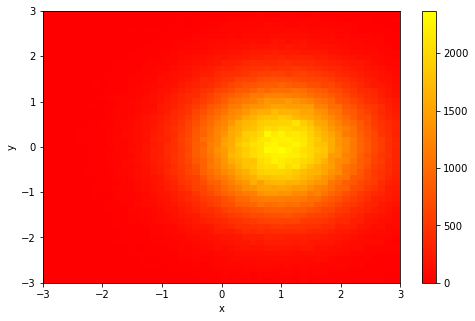

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()

In [4]:
h = hist.NamedHist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)

h.fill(S=data)

NamedHist(Regular(50, -4, 4, underflow=False, overflow=False, metadata={'name': 'S', 'title': 's [units]'}), storage=Double()) # Sum: 999.0

In [5]:
def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp
    return a * exp(-(x-x0)**2/(2*sigma**2)) + offset

/Users/nino/Documents/GitHub/hist/src/hist/core.py:65: RuntimeWarning: divide by zero encountered in true_divide
  pulls = (self.view() - y_nv) / yerr


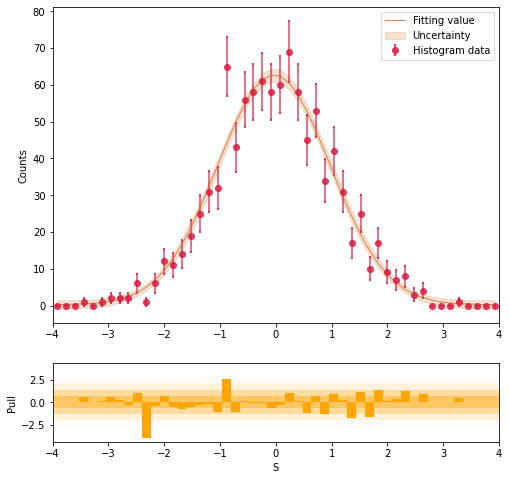

In [6]:
h.pull_plot(pdf, eb_ecolor='crimson', eb_mfc='crimson', eb_mec='crimson', eb_fmt='o', eb_ms=6,\
                eb_capsize=1, eb_capthick=2, eb_alpha=.8, vp_c='orange', vp_ls='-', vp_lw=2,\
                vp_alpha=.8, fp_c='chocolate', fp_ls='-', fp_lw=1, fp_alpha=.8, bar_fc='orange',\
                pp_num=6, pp_fc='orange', pp_alpha=.618, pp_ec=None)

plt.show()

In [7]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="_x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: Name should be a valid Python identifier.

In [8]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: Each axes in the NamedHist instance should have a name.

In [9]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="y"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: Hist instance cannot contain axes with duplicated names.

In [10]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="z"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: The axis names could not be found when filling.